<a href="https://colab.research.google.com/github/Ravneet7878/ML-Codes/blob/main/Linear_Regression_With_Multiple_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use("seaborn")

<ipython-input-209-007f49be86bd>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [ ]:
# Step - 1 -> Data Generation Using Sklearn.

X, y = make_regression(n_samples = 500, n_features = 10, noise = 2, random_state = 0)
n_features = X.shape[1]

In [ ]:
# Creating Table Of The Data Using Pandas.

pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,-1.616956,0.640132,-0.369182,-0.239379,-0.738031,-0.024326,1.099660,0.279925,-0.098150,0.655264
1,0.967446,-1.226622,-0.817493,-1.401347,-0.263937,-0.055353,1.030438,0.352817,-0.152774,-2.047324
2,0.802456,-0.268003,1.867559,0.906045,-0.155010,0.947252,-0.861226,0.614079,0.922207,1.910065
3,-0.977278,1.867558,1.764052,0.400157,-0.151357,0.950088,0.978738,-0.103219,0.410599,2.240893
4,-0.171546,0.523277,-1.292857,0.267051,0.823504,0.771791,-0.039283,2.163236,1.336528,-1.168093


In [ ]:
# Step - 2 -> Normalize The Data.

def normalize(X):
    u = X.mean(axis = 0)
    std = X.std(axis = 0)
    X = (X - u) / std

    return X

In [ ]:
X = normalize(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
1,1.013719,-1.152930,-0.728991,-1.520305,-0.227862,-0.079490,1.047138,0.337413,-0.222377,-2.028019
2,0.846030,-0.196316,1.974867,0.899303,-0.120924,1.012577,-0.858283,0.593479,0.886169,1.988137
3,-0.962820,1.934780,1.870636,0.368813,-0.117338,1.015666,0.995061,-0.109551,0.358586,2.323878
4,-0.143907,0.593310,-1.207684,0.229233,0.839718,0.821459,-0.030363,2.111820,1.313428,-1.135732


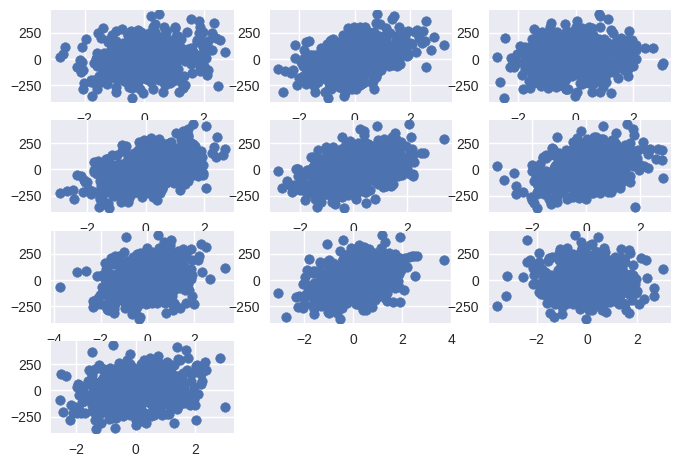

In [ ]:
# Step - 3 -> Visualizing y As The Function Of Each Feature.

for j in range(10):
    plt.subplot(4, 3, j + 1)
    plt.scatter(X[:, j], y)

plt.show()

In [ ]:
# Step - 4 -> Training & Testing The Data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)

In [ ]:
# Step - 5 -> Modelling / Linear Regression With Multiple Features.

# 1) Preprocessing Function.

def preprocessing(X):
    if X.shape[1] == n_features:
        m = X.shape[0]
        ones = np.ones((m, 1))
        X = np.hstack((ones, X))

    return X


# 2) Hypothesis Function.

def hypothesis(X, theta):
    return np.dot(X, theta)


# 3) Error Function.

def error(X, y, theta):
    y_hat = hypothesis(X, theta)
    error = np.mean((y_hat - y) ** 2)

    return error


#  4) Gradient Function.

def gradient(X, y, theta):
    y_hat = hypothesis(X, theta)
    grad = np.dot(X.T, (y_hat - y))
    m = X.shape[0]

    return grad / m


# 5) Training The Model.

def train(X, y, learning_rate = 0.1):
     n = X.shape[1]
     theta = np.random.rand(n)
     error_list = []

     for i in range(100):
          grad = gradient(X, y, theta)
          theta = theta - learning_rate * grad

          error_list.append(error(X, y, theta))

     plt.plot(error_list)
     plt.xlabel("Number Of Iterations")
     plt.ylabel("Error")
     plt.show()
     return theta

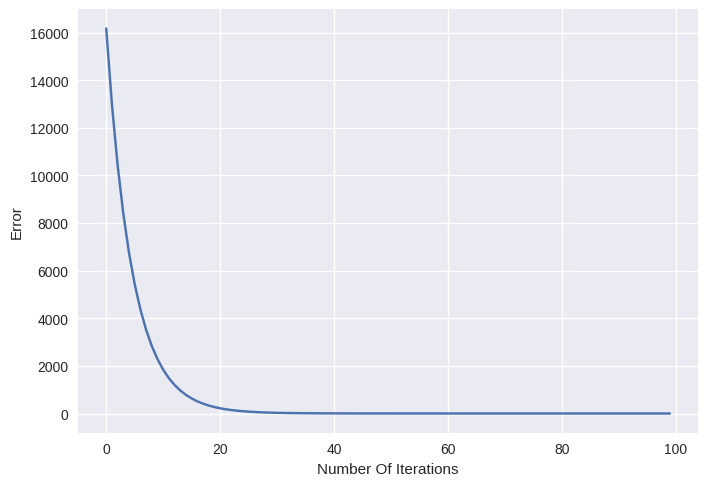

In [ ]:
X_train = preprocessing(X_train)
X_test = preprocessing(X_test)

theta = train(X_train, y_train)

In [ ]:
# Step - 6 -> Evaluating The Model.

def R2_Score(y, y_hat):
    numerator = np.sum((y_hat - y) ** 2)
    denominator = np.sum((y - y.mean()) ** 2)

    return (1 - numerator / denominator) * 100

In [ ]:
y_hat = hypothesis(X_test, theta)
R2_Score(y_test, y_hat)

99.97722111309882

In [ ]:
# Linear Regression Using Sklearn.

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_hat = model.predict(X_test)
model.score(X_test, y_test)

0.9997719989698597